## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [0]:
# 載入 Callbacks
earlystop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1)
earlystop_p25 = keras.callbacks.EarlyStopping(monitor='val_acc', patience=25, verbose=1)

In [14]:
results = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

W0803 19:51:20.401311 140349653362560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

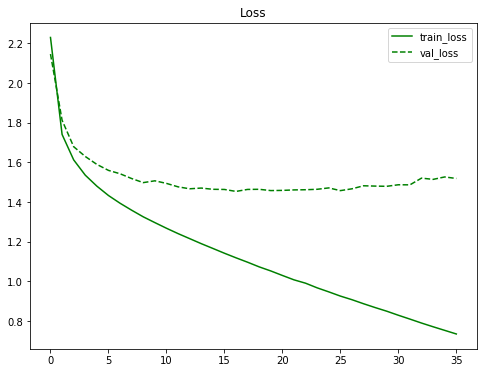

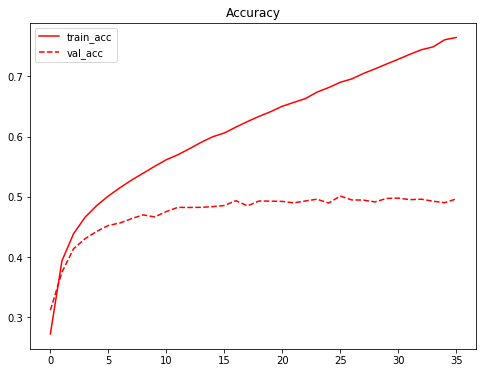

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)), train_loss, '-', label='train_loss', color='g')
plt.plot(range(len(val_loss)), val_loss, '--', label='val_loss', color='g')
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc, '-', label='train_acc', color='r')
plt.plot(range(len(val_acc)), val_acc, '--', label='val_acc', color='r')
plt.legend()
plt.title("Accuracy")
plt.show()

In [19]:
results_p25 = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop_p25])

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

results_p25 = {
    'train_loss': train_loss,
    'val_loss': val_loss,
    'train_acc': train_acc,
    'val_acc': val_acc
}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
__________

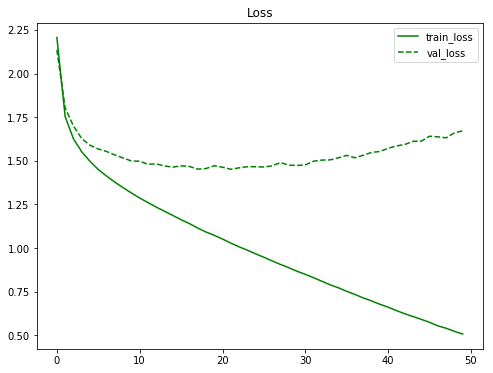

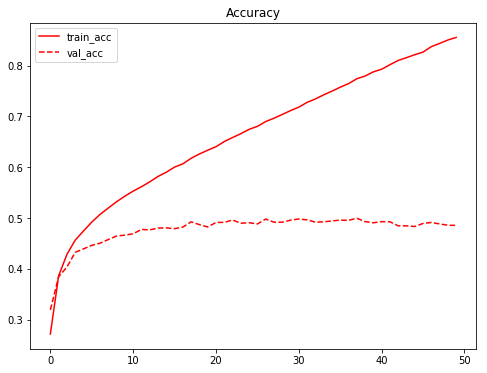

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(range(len(results_p25['train_loss'])), results_p25['train_loss'], '-', label='train_loss', color='g')
plt.plot(range(len(results_p25['val_loss'])), results_p25['val_loss'], '--', label='val_loss', color='g')
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(len(results_p25['train_acc'])), results_p25['train_acc'], '-', label='train_acc', color='r')
plt.plot(range(len(results_p25['val_acc'])), results_p25['val_acc'], '--', label='val_acc', color='r')
plt.legend()
plt.title("Accuracy")
plt.show()